In [2]:
import numpy as np
import pandas as pd
from stl import mesh

https://pypi.org/project/numpy-stl/  
http://numpy-stl.readthedocs.io/en/latest/#  
http://www.fabbers.com/tech/STL_Format#Sct_ASCII

# Creating Mesh objects from a list of vertices and faces

In [3]:
# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

# Plotting

In [4]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

/Users/cricket/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  # Remove the CWD from sys.path while we load stuff.


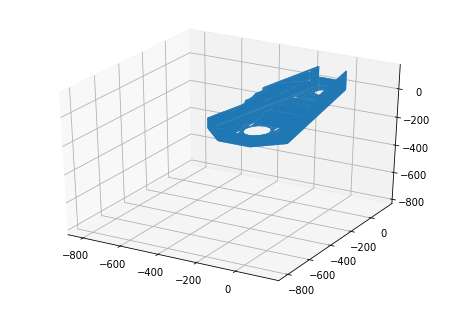

In [7]:
# Create a new plot
figure = plt.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('../Y4 - STL/l3601381.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors), zs=180)

# Auto scale to the mesh size
scale = your_mesh.points.flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
plt.show()

In [8]:
mplot3d.art3d.Poly3DCollection(your_mesh.vectors)

# Evaluating Mesh properties (Volume, Center of gravity, Inertia)

In [9]:
# Using an existing closed stl file:
your_mesh = mesh.Mesh.from_file('../Y4 - STL/l3601381.stl')

volume, cog, inertia = your_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


Volume                                  = 1702590.1206211008
Position of the center of gravity (COG) = [ -50.1440177  -374.05893766   27.64714376]
Inertia matrix at expressed at the COG  = [ 1.18254126e+11 -1.10070572e+06  1.06221269e+06]
                                          [-1.10070572e+06  2.23602277e+10 -4.58187169e+09]
                                          [ 1.06221269e+06 -4.58187169e+09  1.35934838e+11]
